In [180]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 10)
%load_ext autoreload
%autoreload 2

from core.gradient_descent import *
from core.visualizer import *
from core.optimizer_evaluator import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Show that convergence rate doesn't depend on basis choice: the distribution of the number of iterations until convergence has one distinctive peak

In [182]:
generator = lambda: generate_positive_definite_quadratic_form(10, 10, random_orthonormal_basis)

computations = [iteration_count_computer(generator, gradient_descent)() for _ in range(100)]
computations

[51,
 52,
 49,
 52,
 51,
 51,
 51,
 51,
 52,
 52,
 52,
 51,
 52,
 53,
 52,
 52,
 52,
 51,
 51,
 51,
 52,
 52,
 52,
 52,
 51,
 52,
 52,
 53,
 52,
 52,
 53,
 51,
 52,
 52,
 51,
 52,
 50,
 52,
 48,
 51,
 52,
 52,
 52,
 51,
 51,
 53,
 52,
 50,
 52,
 52,
 52,
 52,
 51,
 51,
 50,
 51,
 52,
 53,
 52,
 52,
 51,
 51,
 50,
 52,
 51,
 52,
 51,
 52,
 50,
 50,
 52,
 52,
 52,
 51,
 52,
 52,
 51,
 51,
 51,
 50,
 53,
 52,
 50,
 53,
 53,
 51,
 53,
 52,
 52,
 51,
 52,
 52,
 52,
 52,
 52,
 51,
 52,
 51,
 52,
 50]

In [183]:
mu = np.mean(computations)
mu

51.54

In [184]:
sigma = np.std(computations)
sigma

0.8879189152169246

In [185]:
sigma / mu

0.01722776319784487

(0.0, 63.599999999999994)

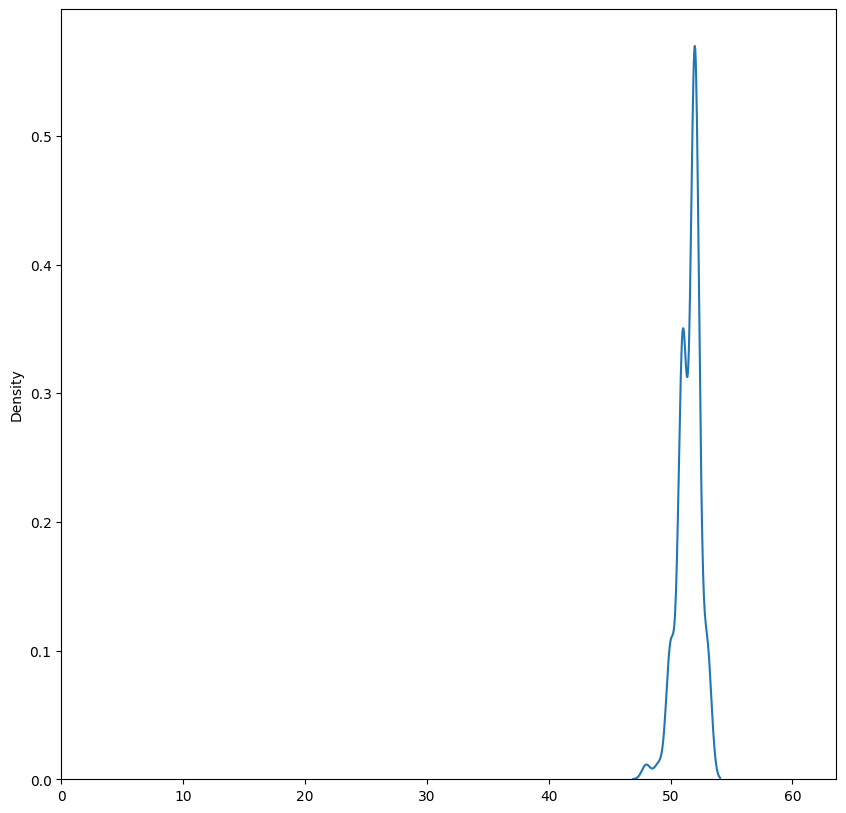

In [186]:
import seaborn as sns

fig, ax = plt.subplots()
sns.kdeplot(computations, ax=ax)
ax.set_xlim(0, max(computations) * 1.2)

# Dependency of iterations until convergence on conditional number and dimension of the problem

As the theorem suggests, the number of iterations until convergence is linear in the condition number of the problem.
Moreover, the number of iterations doesn't depend on the dimension of the problem.

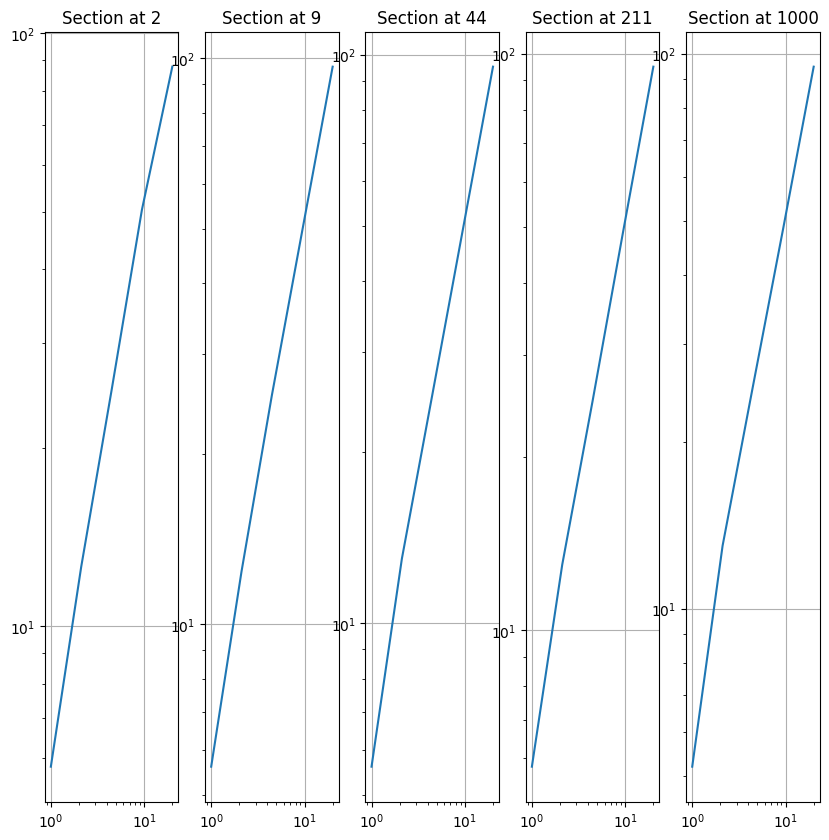

In [197]:
plot_section_graphs(lambda n, k: average_iterations_until_convergence(lambda: generate_positive_definite_quadratic_form(n, k, random_orthonormal_basis), gradient_descent, 5), logspace_range(2, 1000, 5, dtype=int), logspace_range(1, 20, 5))

In [198]:
n_values = logspace_range(2, 100, 10, dtype=int)
k_values = logspace_range(1, 20, 20)

values = [[(n, k) for k in k_values] for n in n_values]

evaluation = [[average_iterations_until_convergence(lambda: generate_positive_definite_quadratic_form(n, k, random_orthonormal_basis), gradient_descent, 5) for k in k_values] for n in n_values]

In [203]:
np.array(evaluation)

array([[ 6. ,  7. ,  7.8,  9.6, 11. , 12.6, 15.8, 18.2, 20.6, 24.2, 26. ,
        31.6, 36.4, 37.8, 48.2, 50.6, 64.2, 70.8, 85.2, 94.2],
       [ 5.4,  6.8,  8.4,  9.8, 11.6, 13. , 15.2, 17.8, 19.4, 23.6, 28. ,
        31.6, 35. , 42. , 47.8, 55. , 62.4, 73.2, 81.4, 96.4],
       [ 5.8,  6.6,  8.4,  9.8, 11.8, 13.4, 15.4, 17.6, 20.8, 22.8, 27.2,
        31.4, 35. , 41.2, 47.8, 55. , 62.8, 71.4, 83. , 96.8],
       [ 5.6,  6.6,  8.4,  9.8, 11.6, 13.8, 15.2, 17.8, 21. , 24. , 26.6,
        31.8, 36.6, 42. , 47.6, 54.8, 63.6, 71.6, 84. , 96.4],
       [ 5.8,  6.6,  7.8,  9.6, 11.6, 13.2, 15.2, 17.6, 20.6, 24. , 27.6,
        31.2, 36.2, 41.2, 47.8, 54.8, 62.8, 72. , 83.6, 96.6],
       [ 5.4,  6.8,  8. ,  9.8, 11.4, 13. , 15.6, 17.8, 20.8, 23.4, 27.4,
        32. , 36.2, 41. , 47.8, 54. , 62.4, 71.6, 82.6, 96.8],
       [ 5.8,  6.6,  8. , 10. , 11.8, 13.4, 15.6, 18. , 20.4, 23.6, 27. ,
        31.2, 36.2, 41. , 47.2, 54.4, 62.6, 71.4, 83. , 94.8],
       [ 5.8,  6.4,  8. ,  9.8, 11.2, 13.

In [204]:
from sklearn.linear_model import LinearRegression

x = np.array(values).reshape(-1, 2)
y = np.array(evaluation).reshape(-1, 1)[:, 0]

In [205]:
x

array([[  2.        ,   1.        ],
       [  2.        ,   1.17077991],
       [  2.        ,   1.37072561],
       [  2.        ,   1.60481801],
       [  2.        ,   1.87888869],
       [  2.        ,   2.19976514],
       [  2.        ,   2.57544084],
       [  2.        ,   3.0152744 ],
       [  2.        ,   3.5302227 ],
       [  2.        ,   4.13311383],
       [  2.        ,   4.83896665],
       [  2.        ,   5.66536496],
       [  2.        ,   6.6328955 ],
       [  2.        ,   7.76566082],
       [  2.        ,   9.09187971],
       [  2.        ,  10.64459014],
       [  2.        ,  12.46247232],
       [  2.        ,  14.59081227],
       [  2.        ,  17.08262993],
       [  2.        ,  20.        ],
       [  3.        ,   1.        ],
       [  3.        ,   1.17077991],
       [  3.        ,   1.37072561],
       [  3.        ,   1.60481801],
       [  3.        ,   1.87888869],
       [  3.        ,   2.19976514],
       [  3.        ,   2.57544084],
 

In [206]:
y

array([ 6. ,  7. ,  7.8,  9.6, 11. , 12.6, 15.8, 18.2, 20.6, 24.2, 26. ,
       31.6, 36.4, 37.8, 48.2, 50.6, 64.2, 70.8, 85.2, 94.2,  5.4,  6.8,
        8.4,  9.8, 11.6, 13. , 15.2, 17.8, 19.4, 23.6, 28. , 31.6, 35. ,
       42. , 47.8, 55. , 62.4, 73.2, 81.4, 96.4,  5.8,  6.6,  8.4,  9.8,
       11.8, 13.4, 15.4, 17.6, 20.8, 22.8, 27.2, 31.4, 35. , 41.2, 47.8,
       55. , 62.8, 71.4, 83. , 96.8,  5.6,  6.6,  8.4,  9.8, 11.6, 13.8,
       15.2, 17.8, 21. , 24. , 26.6, 31.8, 36.6, 42. , 47.6, 54.8, 63.6,
       71.6, 84. , 96.4,  5.8,  6.6,  7.8,  9.6, 11.6, 13.2, 15.2, 17.6,
       20.6, 24. , 27.6, 31.2, 36.2, 41.2, 47.8, 54.8, 62.8, 72. , 83.6,
       96.6,  5.4,  6.8,  8. ,  9.8, 11.4, 13. , 15.6, 17.8, 20.8, 23.4,
       27.4, 32. , 36.2, 41. , 47.8, 54. , 62.4, 71.6, 82.6, 96.8,  5.8,
        6.6,  8. , 10. , 11.8, 13.4, 15.6, 18. , 20.4, 23.6, 27. , 31.2,
       36.2, 41. , 47.2, 54.4, 62.6, 71.4, 83. , 94.8,  5.8,  6.4,  8. ,
        9.8, 11.2, 13. , 15.4, 18. , 20.6, 24. , 27

In [207]:
model = LinearRegression().fit(x, y)

In [208]:
print(f"R^2: {model.score(x, y)}")

R^2: 0.9974409824471397


In [211]:
model.coef_

array([-1.71238428e-03,  4.73454491e+00])

In [212]:
model.intercept_

3.1317925490804726

In [210]:
print(f"{model.coef_[0]} ≈ 0")

-0.0017123842839469323 ≈ 0
